In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [2]:
DIRECTORY=r'/content/drive/MyDrive/Covid_Xray'
CATEGORIES=['Covid19 Negative','Covid19 Positive']

In [6]:
IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        try:
           img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
           #print(img.shape)
        except:
           break
        #img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])

In [ ]:
len(data)

In [7]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [8]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [9]:
X.shape

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [10]:
pickle.dump(data,open("dataset",'wb'))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [13]:
model=Sequential()

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(3,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
20/20 [==============================] - 15s 703ms/step - loss: 0.7188 - accuracy: 0.6038 - val_loss: 0.4328 - val_accuracy: 1.0000
Epoch 2/15
20/20 [==============================] - 14s 691ms/step - loss: 0.5208 - accuracy: 0.7427 - val_loss: 0.1721 - val_accuracy: 0.9420
Epoch 3/15
20/20 [==============================] - 14s 691ms/step - loss: 0.3956 - accuracy: 0.8709 - val_loss: 0.2071 - val_accuracy: 0.8841
Epoch 4/15
20/20 [==============================] - 14s 695ms/step - loss: 0.3739 - accuracy: 0.8732 - val_loss: 0.0989 - val_accuracy: 0.9855
Epoch 5/15
20/20 [==============================] - 14s 690ms/step - loss: 0.3473 - accuracy: 0.8882 - val_loss: 0.2626 - val_accuracy: 0.8841
Epoch 6/15
20/20 [==============================] - 14s 689ms/step - loss: 0.3676 - accuracy: 0.8829 - val_loss: 0.3510 - val_accuracy: 0.8406
Epoch 7/15
20/20 [==============================] - 14s 689ms/step - loss: 0.3091 - accuracy: 0.8956 - val_loss: 0.1605 - val_accuracy: 0.9565

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [17]:
model.save("my_model1")
#model.save("/content/drive/MyDrive/Models/my_model")

INFO:tensorflow:Assets written to: my_model1/assets


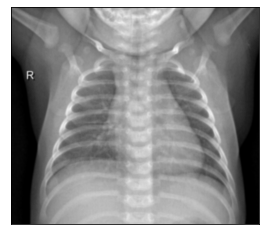

[[1. 0. 0.]]
COVID-19-TEST: NEGATIVE


In [38]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/n2.jpeg'

img = cv2.imread(testimage,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = keras.preprocessing.image.load_img(
    testimage, target_size=(IMG_SIZE, IMG_SIZE)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])
predictions
print(predictions)
if(predictions[0][0]>0.8):
    print("COVID-19-TEST: NEGATIVE")

if(predictions[0][1]>0.8):
    print("COVID-19-TEST: POSITIVE")